<a href="https://colab.research.google.com/github/Gihan007/TensorFlow/blob/main/Car_sales_Prediction_using_linearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('pre_crisis_data.csv')

import pandas as pd

df


,Unnamed: 0.1,Unnamed: 0,Date,Fund,Fund Type,Fund Size,NAV,Unit Holders,Fund flow,Monthly Return,ASPI,3M T Bill,10 Y Bond
0,0,0,31/12/2016,Arpico Ataraxia CMT (Cash Management Trust),Income,131760000,15.890000,49.0,-2.124000e+07,0.020,6277.50,0.0862,0.1266
1,1,1,31/12/2016,CAL Corporate Debt & Gilt Trading Fund,Income,200570000,13.770000,58.0,6.617480e+07,0.020,6278.50,0.0862,0.1266
2,2,2,31/12/2016,CAL Corporate Treasury Fund,Income,2045030000,13.560000,55.0,1.840449e+09,0.020,6279.50,0.0862,0.1266
3,3,3,31/12/2016,CAL High Yield Fund,Income,8512020000,16.410000,224.0,6.426089e+09,0.020,6280.50,0.0862,0.1266
4,4,4,31/12/2016,CAL Income Fund,Income,156500000,12.070000,58.0,-8.525760e+09,0.020,6281.50,0.0862,0.1266
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,2520,2520,31/12/2021,JB Vantage Short Term Gilt Fund,Money,287176860,15.582474,51.0,1.644092e+06,0.005,10783.86,0.0798,0.1140
2521,2521,2521,31/12/2021,NAMAL High Yield Fund,Money,1155428050,26.091614,823.0,-4.275802e+09,0.005,10784.86,0.0798,0.1140
2522,2522,2522,31/12/2021,NDB Wealth Money Fund,Money,23576071885,21.690849,2505.0,5.268639e+09,0.006,10785.86,0.0798,0.1140
2523,2523,2523,31/12/2021,NDB Wealth Money Plus Fund,Money,25126656197,24.780226,12908.0,-7.087327e+09,0.005,10786.86,0.0798,0.1140


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
df = pd.read_csv('pre_crisis_data.csv')

# Print the actual column names in your DataFrame
print(df.columns)

# Assuming 'Fund Size' might have extra spaces or different case, try:
# 1. Strip leading/trailing spaces and convert to lowercase
df.columns = df.columns.str.strip().str.lower()

# 2. Replace any problematic characters in column names
df.columns = df.columns.str.replace(' ', '_') # Example: Replace spaces with underscores


# Convert 'fund_size' column to numeric, handling errors
df['fund_size'] = pd.to_numeric(df['fund_size'], errors='coerce')

# Replace NaN values with 0 if necessary
# df['fund_size'] = df['fund_size'].fillna(0)


# Now try normalizing again
scaler = MinMaxScaler()
# Access the 'fund_size' column (after applying the changes above)
df['fund_size'] = scaler.fit_transform(df[['fund_size']])

# Display the first few rows to verify the changes
print(df.head())

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Date', 'Fund', 'Fund Type',
       ' Fund Size ', 'NAV', 'Unit Holders', 'Fund flow', 'Monthly Return',
       ' ASPI ', '3M T Bill', '10 Y Bond'],
      dtype='object')
   unnamed:_0.1  unnamed:_0        date  \
0             0           0  31/12/2016   
1             1           1  31/12/2016   
2             2           2  31/12/2016   
3             3           3  31/12/2016   
4             4           4  31/12/2016   

                                          fund fund_type  fund_size    nav  \
0  Arpico Ataraxia CMT (Cash Management Trust)    Income   0.001551  15.89   
1       CAL Corporate Debt & Gilt Trading Fund    Income   0.002361  13.77   
2                  CAL Corporate Treasury Fund    Income   0.024075  13.56   
3                          CAL High Yield Fund    Income   0.100207  16.41   
4                              CAL Income Fund    Income   0.001842  12.07   

   unit_holders     fund_flow  monthly_return    aspi  3m_t_bill

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [ ]:
df= pd.read_csv("train.csv")


In [ ]:
df

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [ ]:
df.tail()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0
999,1000,590105,779743,5,67295,4,2,8,199,99,96,414938.5


In [ ]:
df_train = df.sample(frac=0.8,random_state=0)
df_test = df.drop(df_train.index)

In [ ]:
X_Variable_train = df_train.iloc[:,3:-1]
X_Variable_test = df_test.iloc[:,3:-1]

print(X_Variable_train[:5])
X_Variable_train.shape


     years      km  rating  condition  economy  top speed   hp  torque
883      3  116349       2          1       11        170  101     129
788      5  107592       5          8       15        139  101     122
45       4  103761       4         10       11        162  107      96
103      4   96206       5          4        8        194   53      71
760      5  130810       2         10       15        176   54      89


(772, 8)

In [ ]:
Y_Variable_train= df_train.iloc[:,-1]
Y_Variable_test = df_test.iloc[:,-1]

print(Y_Variable_train)
Y_Variable_train.shape


883    239923.0
788    301042.5
45     389925.5
103    349762.0
760    156513.0
         ...   
228    475001.5
673    517366.0
595    226087.5
445     80996.0
117    239400.0
Name: current price, Length: 772, dtype: float64


(772,)

In [ ]:
def plot(feature, x=None, y=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(train_features[feature], train_labels, label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature)
    plt.ylabel('current price')
    plt.legend()

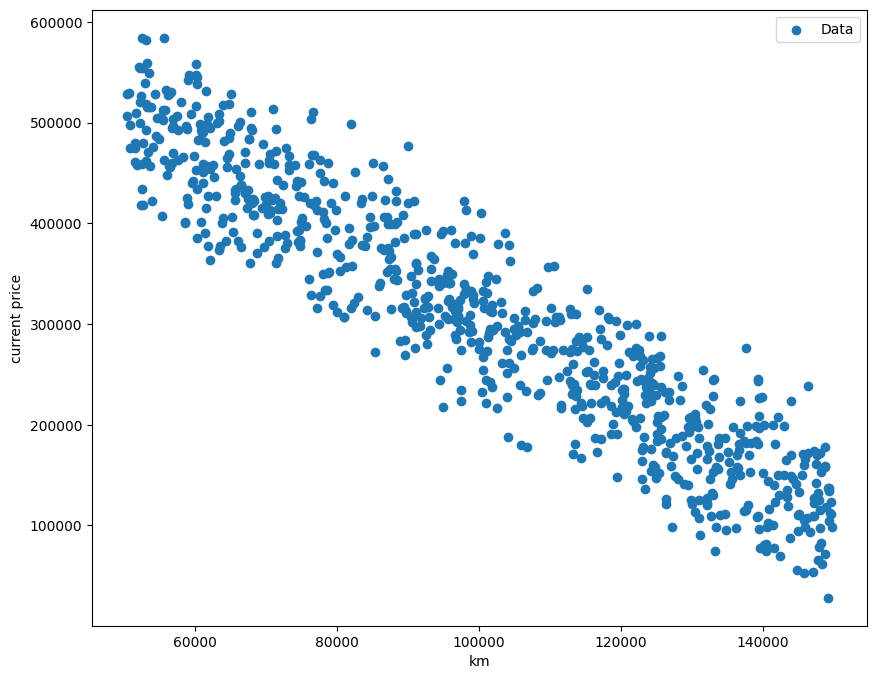

In [ ]:
plot("km")

In [ ]:
# split features from labels
train_features = df_train.copy()
test_features = df_test.copy()

train_labels = train_features.pop('current price')
test_labels = test_features.pop('current price')

In [ ]:
train_labels.head()

,current price
993,307255.0
859,380928.5
298,121022.0
553,174352.5
672,190949.0


In [ ]:
test_labels.head()

,current price
9,197266.0
11,264576.5
19,196816.0
23,140216.5
28,173847.0
